# Linear Regression

-A way to relate two variables with statistical confidence.

-Ex: Does Mortality increase as Age increases?

-Ex: Does the Error Rate decrease as Time Practiced increases?

*For now, we will only cover linear relationships like "Y goes down as X goes up". It is possible to expand Linear Regression to a generalized "Polynomial Regression" that can handle more nuanced relationships like quadratic (or any polynomial relationship), log, etc.*

**Let's run a Linear Regression in Python on our NBA season average data.**

In [ ]:
import pandas as pd
import numpy as np

# This library is used to do simple plots before running our regression
import matplotlib.pyplot as plt

# Two libraries you can do linear regression with.
from sklearn import linear_model
import statsmodels.api as sm

# Used for displaying images from the internet I found to help learn this.
from IPython.display import Image

**Load the pre-made data from the csv file**

In [ ]:
nba = pd.read_csv("NBA Reg Season Player Avgs with Win Pct 2000-2019.csv")
nba.head()

,Year,Player,Tm,start_pct,MP,PTS,TRB,AST,FGA,FG%,...,2PA,2P%,FTA,FT%,STL,BLK,TOV,PF,start_pct.1,win_pct
0,2001,Shareef Abdur-Rahim,VAN,1.000000,40.0,20.5,9.1,3.1,15.8,0.472,...,15.0,0.487,6.6,0.834,1.1,1.0,2.9,2.9,1.000000,0.280488
1,2001,Mike Bibby,VAN,1.000000,38.9,15.9,3.7,8.4,14.1,0.454,...,10.6,0.478,2.3,0.761,1.3,0.1,3.0,1.8,1.000000,0.280488
2,2001,Michael Dickerson,VAN,0.985714,37.4,16.3,3.3,3.3,14.6,0.417,...,11.3,0.429,3.9,0.763,0.9,0.4,2.3,3.0,0.985714,0.280488
3,2001,Othella Harrington,VAN,0.909091,28.8,10.9,6.6,0.8,8.8,0.466,...,8.7,0.470,3.5,0.779,0.4,0.6,2.4,3.1,0.909091,0.280488
4,2001,Bryant Reeves,VAN,0.640000,24.4,8.3,6.0,1.1,7.4,0.460,...,7.3,0.462,1.9,0.796,0.6,0.7,1.2,3.2,0.640000,0.280488


**Look at all the column names to help hypothesize which two variables might be related.**

In [ ]:
nba.columns

Index(['Year', 'Player', 'Tm', 'start_pct', 'MP', 'PTS', 'TRB', 'AST', 'FGA',
       'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'STL', 'BLK', 'TOV',
       'PF', 'start_pct.1', 'win_pct'],
      dtype='object')

**Maybe we can expect that points scored (`PTS`) goes up as minutes played (`MP`) goes up?**

Let's first make a scatterplot of these two columns to explore the data.

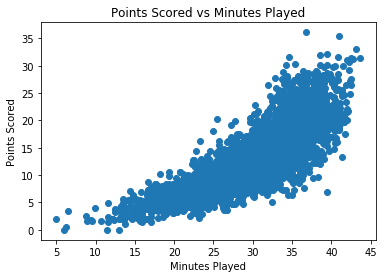

In [ ]:
plt.scatter(x=nba['MP'], y=nba['PTS'])
plt.title("Points Scored vs Minutes Played")
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")
plt.show()

In [ ]:
# Only using 'Year' columnm, so we need to reshape to fit scikit's fit() function
regr_X = np.array(nba['MP']).reshape(-1,1)
# Response is '3PA', or the average # of 3-pointers attempted Per Game
regr_y = nba['PTS']

# Building a linear regression model using scikit's sklearn
regr = linear_model.LinearRegression()

# Calculating the parameters of our regression model using the fit() method
lin_model = regr.fit(X=regr_X, y=regr_y)

# Coefficient of year in our model
print("Coefficient of minutes played in our model: ", lin_model.coef_)

# Intercept Value in our model
print("Intercept in our model: ", lin_model.intercept_)

# Coefficient of Determination Score
print("R^2 Score: ", regr.score(X=regr_X, y=regr_y))

Coefficient of minutes played in our model:  [0.76379986]
Intercept in our model:  -9.762575722948242
R^2 Score:  0.6433337196726847


PTS = (0.76) MP - 9.76  

In [ ]:
# Need to add a column of 1s to create a constant term
# statsmodels.api does not do it for us like sklearn does
summary_X = sm.add_constant(regr_X)

# Make into dataframes to make sure variable names are shown in output
summary_X = pd.DataFrame(summary_X).reset_index(drop=True)
summary_X.columns = ['Constant', 'MP']
summary_y = pd.DataFrame(regr_y).reset_index(drop=True)

summary_est = sm.OLS(summary_y, summary_X)

print(summary_est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     6328.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:09:20   Log-Likelihood:                -9302.1
No. Observations:                3510   AIC:                         1.861e+04
Df Residuals:                    3508   BIC:                         1.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -9.7626      0.296    -33.002      0.0

t-critical = 1.960
Our model's t-value = 79.546

Since our t-value was > t*, we have statistically-significant evidence to suggest at a 95% confidence level that Minutes Played and Points Scored have a positive, linear relationship 

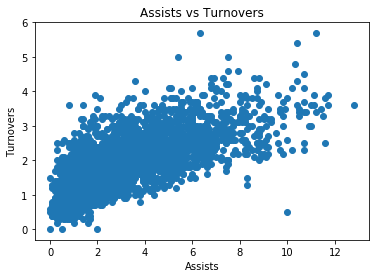

In [ ]:
plt.scatter(x=nba['AST'], y=nba['TOV'])
plt.title("Assists vs Turnovers")
plt.xlabel("Assists")
plt.ylabel("Turnovers")
plt.show()

Ho: Assists & TOV have NO relationship.

Ha: Assists & TV have a positive, linear relationship.

Ho: u=0

Ha: u>0

In [ ]:
# Only using 'Year' columnm, so we need to reshape to fit scikit's fit() function
regr_X = np.array(nba['AST']).reshape(-1,1)
# Response is '3PA', or the average # of 3-pointers attempted Per Game
regr_y = nba['TOV']

# Need to add a column of 1s to create a constant term
# statsmodels.api does not do it for us like sklearn does
summary_X = sm.add_constant(regr_X)

# Make into dataframes to make sure variable names are shown in output
summary_X = pd.DataFrame(summary_X).reset_index(drop=True)
summary_X.columns = ['Constant', 'AST']
summary_y = pd.DataFrame(regr_y).reset_index(drop=True)

summary_est = sm.OLS(summary_y, summary_X)

print(summary_est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    TOV   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     3494.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:28:40   Log-Likelihood:                -2937.6
No. Observations:                3510   AIC:                             5879.
Df Residuals:                    3508   BIC:                             5892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       1.0500      0.016     65.449      0.0

TOV = (0.26)(AST) + 1.05

An increase in one assist yields an average of 0.26 more turnovers.

t-critical = 1.960
Our model's t-value = 59.108

Since our t-value was > t*, we have statistically-significant evidence to suggest at a 95% confidence level that Assists and Turnovers have a positive, linear relationship 